In [1]:
import pandas as pd
import numpy as np

In [2]:
wine=pd.read_csv("winequalityN.csv")
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6487 non-null   float64
 1   volatile acidity      6489 non-null   float64
 2   citric acid           6494 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6488 non-null   float64
 9   sulphates             6493 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [4]:
wine.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
wine.fillna(wine.mean(), inplace=True)


In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


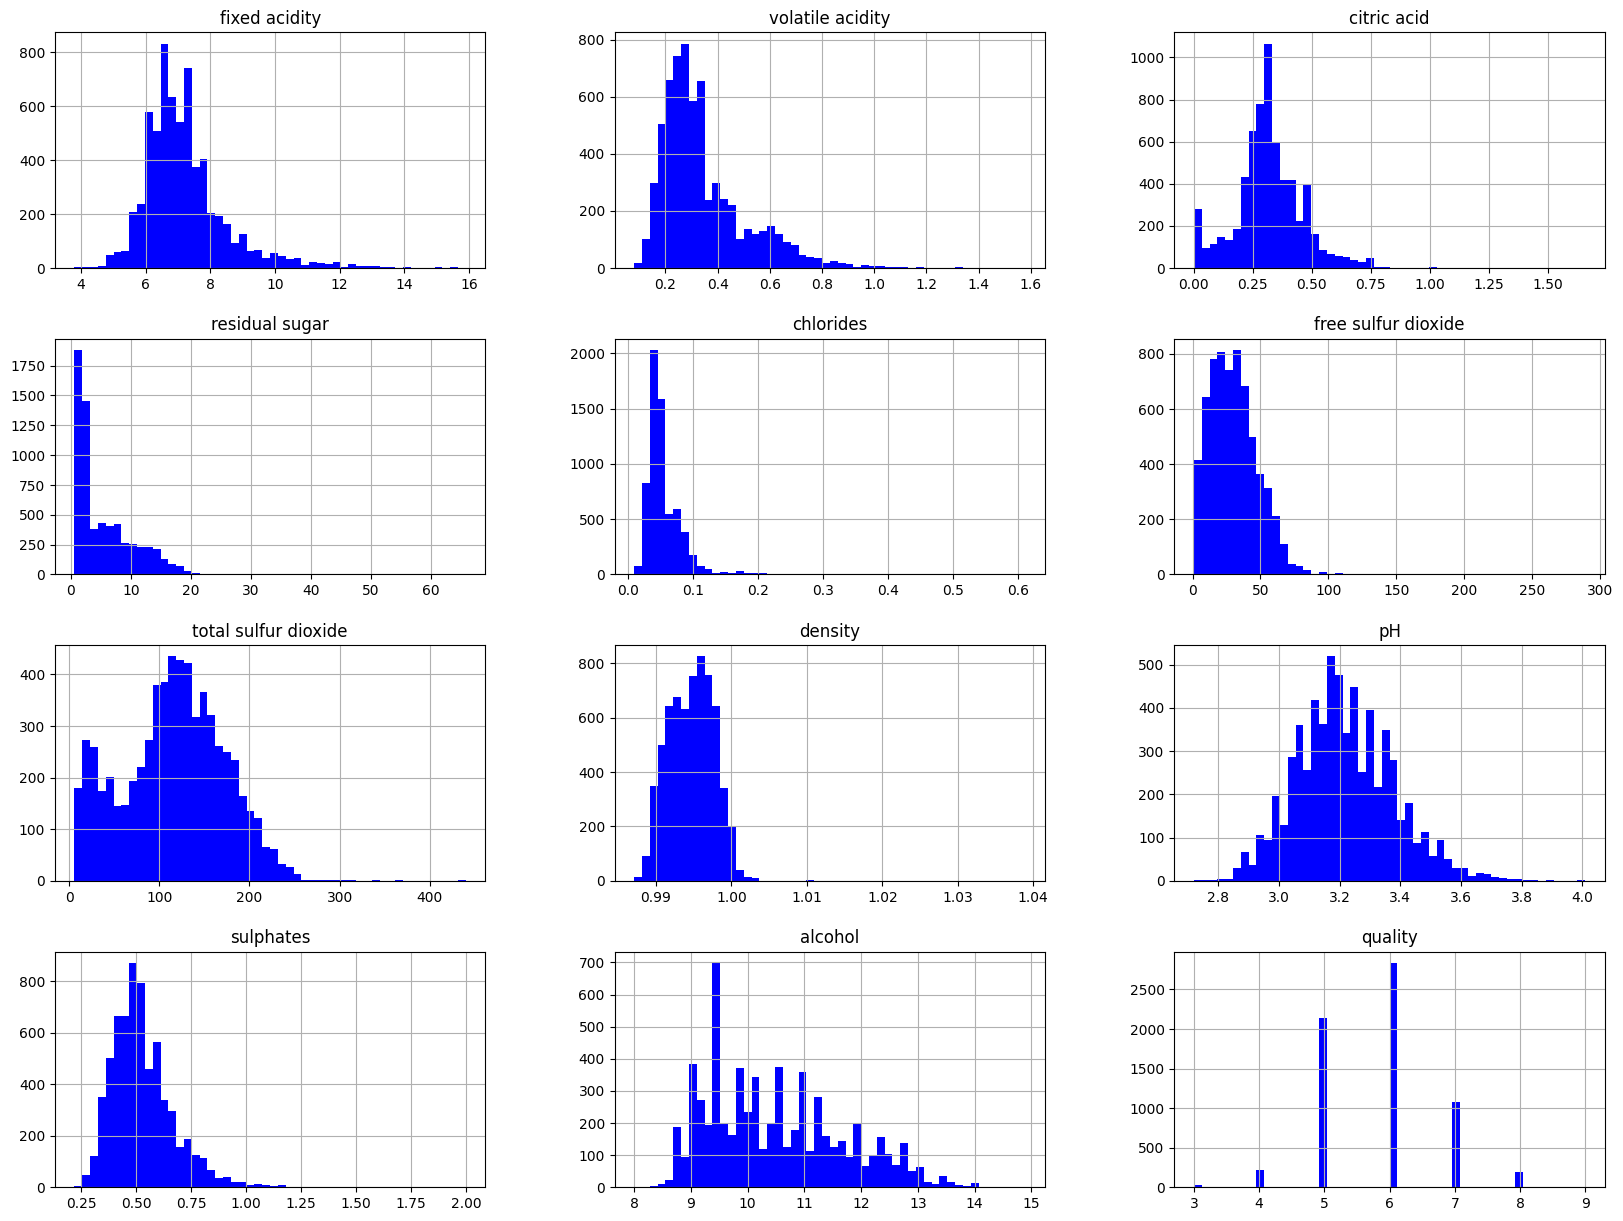

In [7]:
import matplotlib.pyplot as plt

wine.hist(bins=50, figsize=(20,15), color= "blue")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x= wine.drop(["quality"], axis=1)
y= wine["quality"]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(5197, 11)
(1300, 11)
(5197,)
(1300,)


In [12]:
from sklearn.linear_model import ElasticNet


In [13]:
lr =  ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
lr.fit(x_train,y_train)

ElasticNet(alpha=0.1, random_state=42)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [15]:
def eval_metrics(actual,pred):
    rmse=np.sqrt(mean_squared_error(actual,pred))
    mae=mean_absolute_error(actual,pred)
    r2=r2_score(actual,pred)

    return rmse,mae,r2

In [16]:
predicted_value=lr.predict(x_test)

In [17]:
predicted_value

array([6.25975222, 5.84172167, 5.6085705 , ..., 5.35931512, 5.8597784 ,
       5.45561726])

In [18]:
( rmse,mae,r2) = eval_metrics(y_test, predicted_value)

In [19]:
print("rmse =",rmse)
print("mae =",mae)
print("r2 =",r2)



rmse = 0.7303510202322507
mae = 0.5883556922734104
r2 = 0.2537590174636246
